Saving Student Performance Predictor for EduQuest Coaching.csv to Student Performance Predictor for EduQuest Coaching.csv
Accuracy: 70.00%

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.57      0.69        81
         Low       0.00      0.00      0.00        18
      Medium       0.64      0.93      0.76       101

    accuracy                           0.70       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.67      0.70      0.66       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


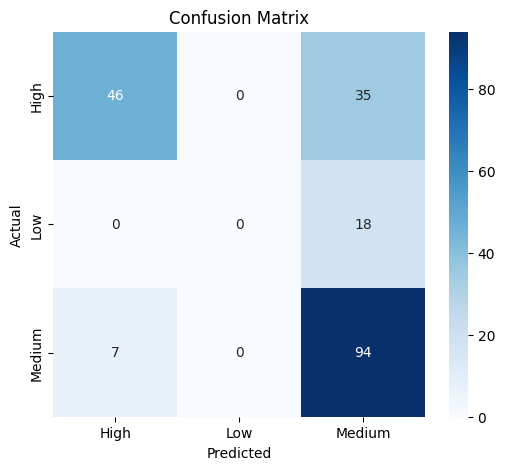

<ipython-input-1-2791229581>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


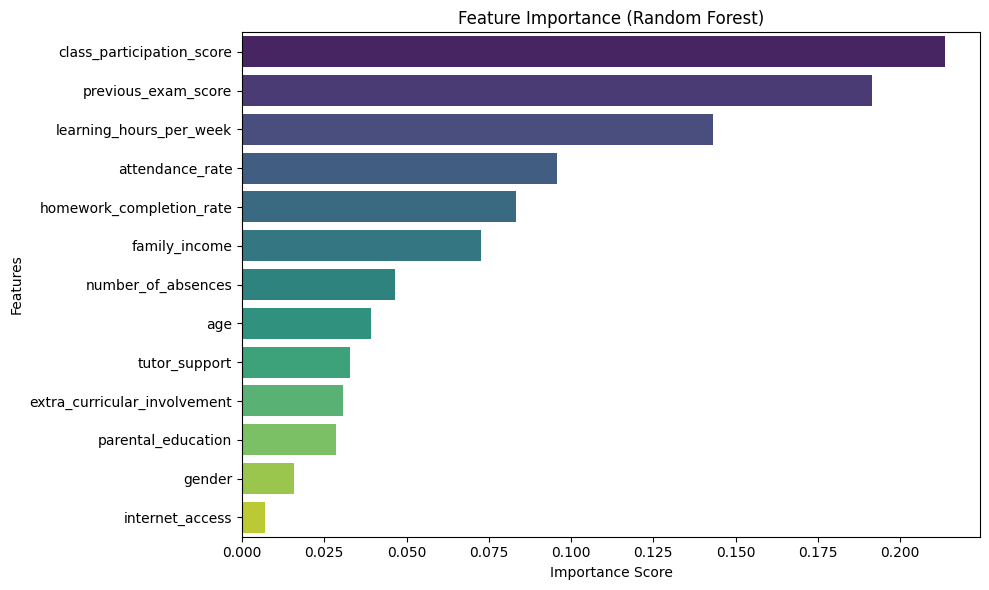

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Upload CSV File
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

# Step 3: Encode Categorical Columns
categorical_cols = ['gender', 'parental_education', 'internet_access',
                    'extra_curricular_involvement', 'tutor_support']
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 4: Convert final scores to performance categories
def classify_performance(score):
    if score < 60:
        return 'Low'
    elif score < 80:
        return 'Medium'
    else:
        return 'High'

df_encoded['performance_category'] = df_encoded['final_exam_score'].apply(classify_performance)

# Step 5: Define Features and Target
X = df_encoded.drop(['final_exam_score', 'performance_category'], axis=1)
y = df_encoded['performance_category']

# Encode target
y_encoded = le.fit_transform(y)

# Step 6: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 8: Train Classification Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Step 10: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 11: Feature Importance Visualization
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
